# Capstone Project - The Battle of Neighborhoods - An insight into the Italian Cuisine favoured localities in Hyderabad

# Introduction

## Description and discussion of the background


Hyderabad being one of the metropolitan cities of India has a population of about 9.7 million people [1]. Influenced by the Mughal rule, the Nizams city is known for an amalgam of South Indian and Mughals cuisines. The city of food lovers was listed as “creative city of gastronomy” by UNESCO [1]. Well known hyderabadi haleem and biryani carry the National Geographical Indications tag. Not just the Mughals, its cuisine has a great influence from the turkish, local telugu, Iranian and Marathwada cuisines [1].

Though there are varied cuisines prefered by the localites, the city is still adapting to the food influences from other far off countries such as Italy, Mexico, Korean, Chinese etc. To open an Italian restaurant in Hyderabad, it needs some in depth analysis of the current Italian restaurants in the cities and their localities to find out an ideal place to open a new Italian restaurant which can attract enough customers. 
This analysis is being carried out to find out the areas in the city that have Italian restaurants, most favoured food items from these restaurants and ideal costs per two according to the locality. This analysis will help in zeroing in on an ideal place to open an Italian restaurant that would be accepted by the people living in those neighbourhoods. 


## Description of the Data


For this analysis, I am considering the restaurant data in India from the Kaggle datasets (https://www.kaggle.com/ngokulakannan/zomato-india-restaurants2-lakh-restaurants-data).

The dataset has already information on the restaurants, area, latitude, longitude, favoured item, rating, etc.

To find the nearby neighbourhoods, I will be using the Foursquare location data.  By using this api I will get all the venues in each neighborhood.


## Data Collection

The Kaggle dataset was downloaded from the https://www.kaggle.com/ngokulakannan/zomato-india-restaurants2-lakh-restaurants-data link and saved to the local computer. 

In [1]:
# Loading the libraries

import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library

import geocoder

In [2]:
# Passing the downloaded data into a dataframe

df = pd.read_csv('indian_restaurants_details_cleaned_data.csv')
df.head()


,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,timings,online_order,table_reservation,delivery_only,famous_food,longitude,latitude
0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21.0,011 22486474 +91 9717806814,North Indian,300.0,"C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,False,False,NaN,77.284871,28.617732
1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51.0,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500.0,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",False,False,False,Penne Pasta,73.184287,19.205887
2,https://www.zomato.com/ncr/brij-palace-restaur...,Brij Palace Restaurant,Delhi NCR,Jasola,NaN,NaN,+91 9891828106,North Indian,250.0,"4, Okhla Bus Stand, Jamia Nagar, Near, Jasola,...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",False,False,False,"Chana Masala , Butter Naan , Paneer Bhujia , D...",77.291223,28.563034
3,https://www.zomato.com/ncr/sahib-hotel-paharga...,Sahib Hotel,Delhi NCR,Paharganj,NaN,NaN,+91 9670005455,North Indian,300.0,"121, Amrit Kaur Market, Opposite New Delhi Rai...","{'Mon': [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1...",False,False,False,NaN,77.218298,28.642411
4,https://www.zomato.com/kolkata/chunkys-shibpur...,Chunky's,Kolkata,Shibpur,3.0,78.0,+91 8442828284,"Italian, Pizza, Continental",500.0,"523, G.T Road, Howrah., Shibpur, Howrah","{'Mon': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",True,False,False,NaN,88.330708,22.577758


In [3]:
df.columns

Index(['zomato_url', 'name', 'city', 'area', 'rating', 'rating_count',
       'telephone', 'cusine', 'cost_for_two', 'address', 'timings',
       'online_order', 'table_reservation', 'delivery_only', 'famous_food',
       'longitude', 'latitude'],
      dtype='object')

In [4]:
# DATA PREPROCESSING

#selecting data from Hyderbad

df_hyd = df[df['city'] == 'Hyderabad']

df_hyd.reset_index(drop=True, inplace=True)
df_hyd.head()


,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,timings,online_order,table_reservation,delivery_only,famous_food,longitude,latitude
0,https://www.zomato.com/hyderabad/urban-asia-ki...,Urban Asia - Kitchen & Bar,Hyderabad,Jubilee Hills,4.2,2558.0,+91 7995571574 +91 7207956888,"Chinese, Thai, Asian, Seafood, Sushi",1300.0,"1259/A, 3rd Floor, Beside Heritage Fresh, Road...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",True,True,False,"Noodle , Fish , Sea Food , Veg Sushi , Pan Fri...",78.412969,17.428916
1,https://www.zomato.com/hyderabad/dine-hill-mas...,Dine Hill,Hyderabad,Masab Tank,3.9,1190.0,040 64609221 +91 9290679696,"Arabian, North Indian, Chinese",800.0,"One Downing Street, Masab Tank, Hyderabad","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5,...",True,True,False,"Chicken Grill , Mutton Biryani , Chicken Birya...",78.451647,17.405280
2,https://www.zomato.com/hyderabad/gulf-bakers-a...,Gulf Bakers And Restaurant,Hyderabad,Bowenpally,3.8,1215.0,040 27758310,"Bakery, North Indian, Chinese, Biryani",500.0,"1, KR Nagar, Bowenpally, Secunderabad","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5,...",True,False,False,"Biryani , Burgers , Chicken Frankie , Mutton C...",78.473394,17.463614
3,https://www.zomato.com/hyderabad/essence-fusio...,Essence Fusion,Hyderabad,Jubilee Hills,4.6,300.0,040 33165661,"North Indian, European, Continental",1000.0,"Plot 280 A, 1st Floor, Road 10 C, Jubilee Hill...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,True,False,"Mango Sorbet , Kashmiri Pulao , Mocktails , Ch...",78.412096,17.436012
4,https://www.zomato.com/hyderabad/daily-dose-ba...,Daily Dose - Bar Hop,Hyderabad,Jubilee Hills,4.3,840.0,+91 9618532261 +91 9000780005,"Continental, North Indian, Chinese",1000.0,"Plot 789, Road 36, 5th Floor, Jubilee Hills, H...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",False,True,False,"Cocktails , Beer , French Fries , Chicken Tend...",78.401802,17.435128


In [5]:
df_hyd.shape

(12393, 17)

In [6]:
df_hyd.columns

Index(['zomato_url', 'name', 'city', 'area', 'rating', 'rating_count',
       'telephone', 'cusine', 'cost_for_two', 'address', 'timings',
       'online_order', 'table_reservation', 'delivery_only', 'famous_food',
       'longitude', 'latitude'],
      dtype='object')

In [7]:
# Selecting columns of interest

df_h=df_hyd[df_hyd.city=='Hyderabad'][["city","name","area","rating","cusine","cost_for_two","famous_food","longitude","latitude"]]
df_h.head()


,city,name,area,rating,cusine,cost_for_two,famous_food,longitude,latitude
0,Hyderabad,Urban Asia - Kitchen & Bar,Jubilee Hills,4.2,"Chinese, Thai, Asian, Seafood, Sushi",1300.0,"Noodle , Fish , Sea Food , Veg Sushi , Pan Fri...",78.412969,17.428916
1,Hyderabad,Dine Hill,Masab Tank,3.9,"Arabian, North Indian, Chinese",800.0,"Chicken Grill , Mutton Biryani , Chicken Birya...",78.451647,17.405280
2,Hyderabad,Gulf Bakers And Restaurant,Bowenpally,3.8,"Bakery, North Indian, Chinese, Biryani",500.0,"Biryani , Burgers , Chicken Frankie , Mutton C...",78.473394,17.463614
3,Hyderabad,Essence Fusion,Jubilee Hills,4.6,"North Indian, European, Continental",1000.0,"Mango Sorbet , Kashmiri Pulao , Mocktails , Ch...",78.412096,17.436012
4,Hyderabad,Daily Dose - Bar Hop,Jubilee Hills,4.3,"Continental, North Indian, Chinese",1000.0,"Cocktails , Beer , French Fries , Chicken Tend...",78.401802,17.435128


In [8]:
df_h = df_h[df_h['rating'] !=0.0]
#df_h.head()
df_h.shape

(12393, 9)

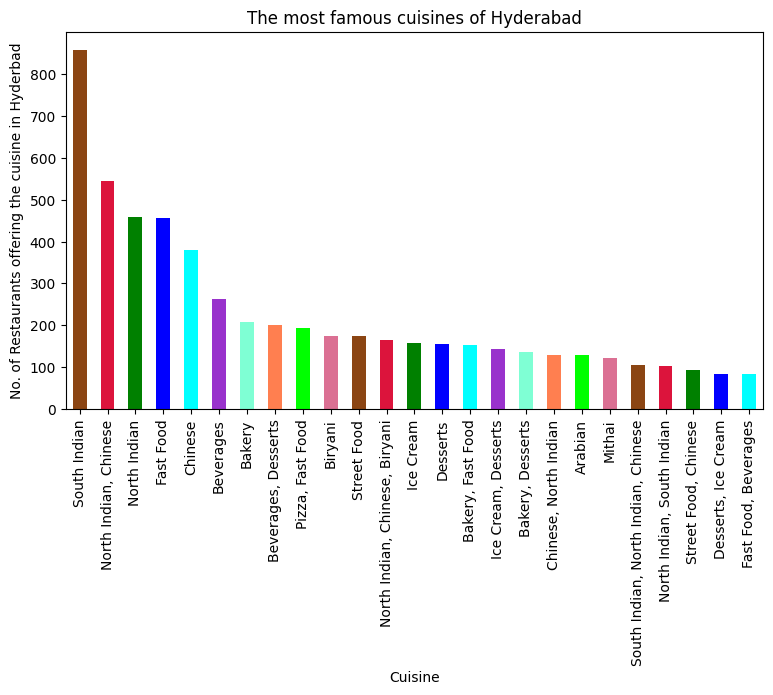

In [78]:
#most famous cuisines of Hyderabad

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The most famous cuisines of Hyderabad')
#On x-axis

#giving a bar plot

df_h['cusine'].value_counts().nlargest(25).plot(kind='bar',color=['saddlebrown', 'crimson', 'green', 'blue', 'cyan',"darkorchid","aquamarine","coral","lime","palevioletred"])

plt.xlabel('Cuisine')
#On y-axis
plt.ylabel('No. of Restaurants offering the cuisine in Hyderbad')

#displays the plot
#plt.show()
plt.savefig('famous_cusines.png')

In [12]:
# Number of Italian Restaurants in Hyderabad?

df_i=df_h[df_h['cusine'].str.startswith('Italian')]
df_i.reset_index(drop=True, inplace=True)
#df_c=df_c[df_c['rating']>3.8]
df_i.shape

(72, 9)

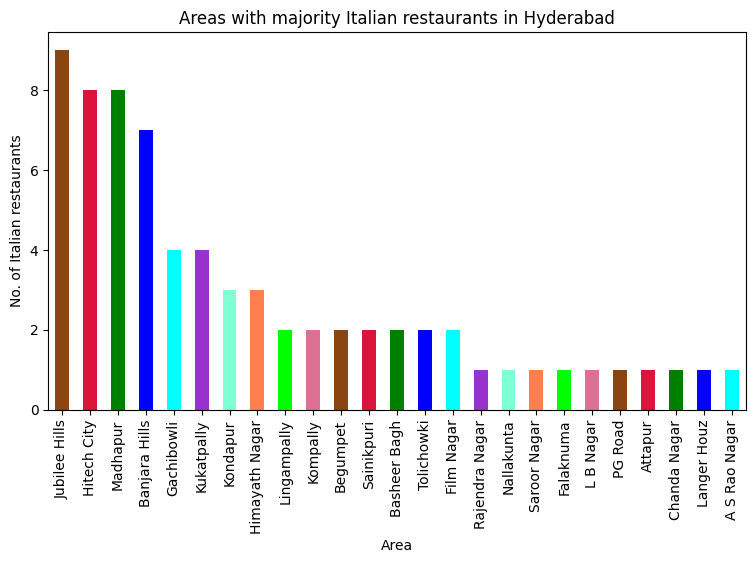

In [13]:
#areas with majority of italian restaurants
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Areas with majority Italian restaurants in Hyderabad')
#On x-axis

#giving a bar plot

df_i['area'].value_counts().nlargest(25).plot(kind='bar',color=['saddlebrown', 'crimson', 'green', 'blue', 'cyan',"darkorchid","aquamarine","coral","lime","palevioletred"])

plt.xlabel('Area')
#On y-axis
plt.ylabel('No. of Italian restaurants')

#displays the plot
plt.show()

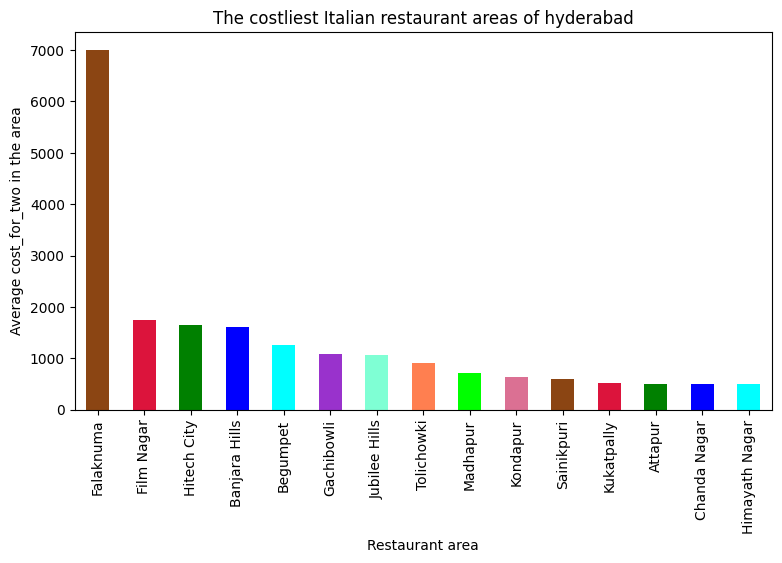

In [14]:
# Pricey Italian restaurants in Hyderabad

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The costliest Italian restaurant areas of hyderabad')
#On x-axis
#my_colors = 'rgbkymc'
#giving a bar plot
df_i.groupby('area')['cost_for_two'].mean().nlargest(15).plot(kind='bar',color=['saddlebrown', 'crimson', 'green', 'blue', 'cyan',"darkorchid","aquamarine","coral","lime","palevioletred"])

plt.xlabel('Restaurant area')
#On y-axis
plt.ylabel('Average cost_for_two in the area')
#displays the plot
plt.show()

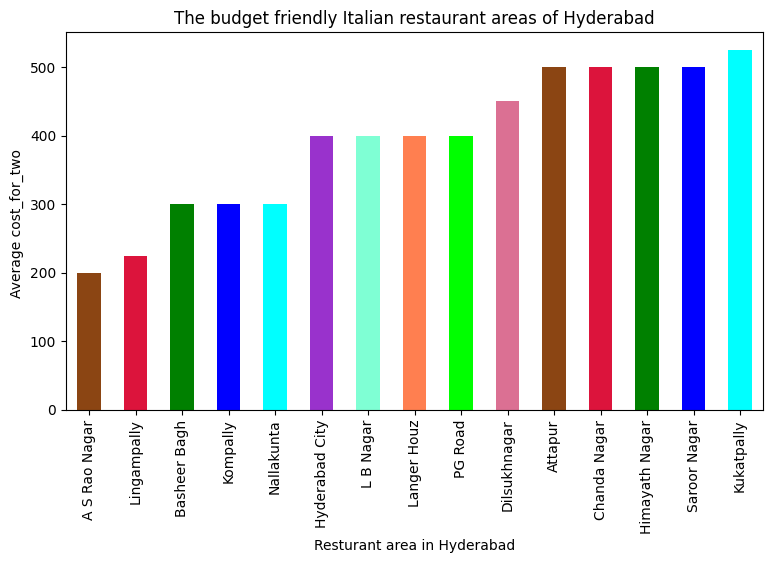

In [15]:
# what places are have budget friendly Italian restaurants in Hyderabad?

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The budget friendly Italian restaurant areas of Hyderabad')
#On x-axis

#giving a bar plot

df_i.groupby('area')['cost_for_two'].mean().nsmallest(15).plot(kind='bar',color=['saddlebrown', 'crimson', 'green', 'blue', 'cyan',"darkorchid","aquamarine","coral","lime","palevioletred"])

plt.xlabel('Resturant area in Hyderabad')
#On y-axis
plt.ylabel('Average cost_for_two ')

#displays the plot
plt.show()

# Clustering nearby areas of Chinese restaurants together using k - means clustering

In [16]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

X = df_i['latitude']
Y = df_i['longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=6, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_i['Cluster'] = clusters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [17]:
df_i.head()

,city,name,area,rating,cusine,cost_for_two,famous_food,longitude,latitude,Cluster
0,Hyderabad,Coco's Bar & Grill,Banjara Hills,4.2,"Italian, Chinese, Continental, North Indian",1700.0,"Pasta , Vegetable Biryani , Chicken 65 , Cockt...",78.424777,17.423974,0
1,Hyderabad,Italian Feast,Kompally,2.9,"Italian, Street Food",300.0,NaN,78.478542,17.505006,2
2,Hyderabad,Sizzling joe,Kukatpally,2.6,Italian,600.0,"Chicken Steak Sizzler , Paneer Shashlik Sizzle...",78.389078,17.484443,5
3,Hyderabad,TOS - Tales Over Spirits,Banjara Hills,4.0,"Italian, North Indian, Chinese",1500.0,"Cocktails , Mocktails , Cheesecake , Rajma Cha...",78.438121,17.424793,0
4,Hyderabad,Cyberabad Pub Exchange,Hitech City,3.9,"Italian, Chinese, North Indian, Fast Food",1000.0,"Cocktails , Chilli Chicken , Thin Crust Pizza",0.000000,0.000000,1


In [18]:
# created map to show the restaurant cluters

i_map = folium.Map(location=[17.385, 78.8467], zoom_start=12)

colors = ['red', 'green', 'blue', 'yellow','orange',"violet"]


for latitude, longitude, area, cluster in zip(df_i['latitude'], df_i['longitude'], df_i['area'], df_i['Cluster']):
    label = folium.Popup(area, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(i_map)  

i_map

In [19]:
#Grouping the localities
df_i_res =  df_i.groupby('area').count()['name'].to_frame().reset_index()

df_i_rating= df_i.groupby('area')['rating'].mean().to_frame().reset_index()

df_i_cusine = df_i.groupby(['area'])['cusine'].unique().agg(', '.join).reset_index()

df_i_cost=df_i.groupby(['area'])['cost_for_two'].mean().to_frame().reset_index()


df_i_lat=df_i.groupby(['area']).mean()['latitude'].to_frame()

df_i_lon=df_i.groupby(['area']).mean()['longitude'].to_frame().reset_index()



df_final = pd.merge(df_i_lat,df_i_lon,on='area').merge(df_i_res, on='area').merge(df_i_cusine, on='area').merge(df_i_rating,on ='area').merge(df_i_cost, on ='area')


In [20]:

df_final.columns=("area","latitude","longitude","No_of_restaurants","cusine","Avg_rating","Avg_cost_for_two")
df_final

,area,latitude,longitude,No_of_restaurants,cusine,Avg_rating,Avg_cost_for_two
0,A S Rao Nagar,17.481570,78.555370,1,"Italian, Pizza",3.800000,200.000000
1,Attapur,17.369098,78.417874,1,"Italian, Mexican, Desserts",NaN,500.000000
2,Banjara Hills,17.421390,78.434392,7,"Italian, Chinese, Continental, North Indian, I...",4.114286,1607.142857
3,Basheer Bagh,17.400793,78.479537,2,"Italian, Italian, Chinese, Fast Food",3.200000,300.000000
4,Begumpet,17.438561,78.461171,2,"Italian, Italian, Beverages",3.700000,1250.000000
5,Chanda Nagar,17.494734,78.326492,1,"Italian, Fast Food, Desserts",3.400000,500.000000
6,Dilsukhnagar,17.371278,78.531168,1,"Italian, Desserts",3.400000,450.000000
7,Falaknuma,17.334312,78.467562,1,"Italian, Mediterranean, Thai",4.400000,7000.000000
8,Film Nagar,17.416143,78.416837,2,"Italian, Continental",4.250000,1750.000000
9,Gachibowli,13.086180,58.767648,4,"Italian, North Indian, Chinese, Salad, Italian...",3.966667,1087.500000


In [21]:

df_final.shape

#x=df_final.head()


(27, 7)

In [22]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'PCZRGM1AYROUUSUSB4AR5KTCT0AXFIVENA5LPCLJMYNNO2EU' # Foursquare ID
CLIENT_SECRET = 'Q1WQPL0UDNFTAA3WCKQNGVLJ3L1UBPFYXG5YEEOXMCNKDEJT' # Foursquare Secret
VERSION = '20200324' # Foursquare API version



In [23]:

#create a function to repeat the same process to all the Locality in New Delhi


def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
#find the venues nearby Italian restaurant areas

hyd_venues = getNearbyVenues(names=df_final['area'],
                                   latitudes=df_final['latitude'],
                                   longitudes=df_final['longitude']
                                  )


A S Rao Nagar
Attapur
Banjara Hills
Basheer Bagh
Begumpet
Chanda Nagar
Dilsukhnagar
Falaknuma
Film Nagar
Gachibowli
Himayath Nagar
Hitech City
Hyderabad City
Jubilee Hills
Kompally
Kondapur
Kukatpally
L B Nagar
Langer Houz
Lingampally
Madhapur
Nallakunta
PG Road
Rajendra Nagar
Sainikpuri
Saroor Nagar
Tolichowki


In [25]:
hyd_venues.head()


,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A S Rao Nagar,17.48157,78.55537,Cafe Coffee Day,17.481262,78.555077,Café
1,A S Rao Nagar,17.48157,78.55537,The Coffee Cup,17.483180,78.552104,Café
2,A S Rao Nagar,17.48157,78.55537,Swagath Grand,17.482022,78.553261,Indian Restaurant
3,A S Rao Nagar,17.48157,78.55537,Foodworld,17.481645,78.554110,Department Store
4,A S Rao Nagar,17.48157,78.55537,Vodafone Store,17.482264,78.552923,Electronics Store


In [26]:
hyd_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
A S Rao Nagar,6,6,6,6,6,6
Attapur,1,1,1,1,1,1
Banjara Hills,10,10,10,10,10,10
Basheer Bagh,16,16,16,16,16,16
Begumpet,10,10,10,10,10,10
Chanda Nagar,12,12,12,12,12,12
Dilsukhnagar,8,8,8,8,8,8
Falaknuma,4,4,4,4,4,4
Film Nagar,9,9,9,9,9,9


In [27]:
print('There are {} uniques categories.'.format(len(hyd_venues['Venue Category'].unique())))

There are 73 uniques categories.


In [28]:
## Analyze Each Locality

# one hot encoding
hyd_onehot = pd.get_dummies(hyd_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
hyd_onehot['Locality'] = hyd_venues['Locality'] 

# move Locality column to the first column
column_list = hyd_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
hyd_onehot = hyd_onehot[column_list]

hyd_onehot.head()

,Locality,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bar,...,Sandwich Place,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Sporting Goods Shop,Sports Bar,Tea Room,Vegetarian / Vegan Restaurant
0,A S Rao Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A S Rao Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A S Rao Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A S Rao Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A S Rao Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
hyd_grouped = hyd_onehot.groupby('Locality').mean().reset_index()
hyd_grouped

,Locality,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bar,...,Sandwich Place,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Sporting Goods Shop,Sports Bar,Tea Room,Vegetarian / Vegan Restaurant
0,A S Rao Nagar,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,Attapur,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,Banjara Hills,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.100000,0.1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,Basheer Bagh,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.062500,0.0,0.000000,0.062500,0.000000,0.000000,0.062500
4,Begumpet,0.000000,0.000000,0.000000,0.000,0.1,0.000000,0.000000,0.000000,0.1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000
5,Chanda Nagar,0.083333,0.083333,0.000000,0.000,0.0,0.000000,0.000000,0.083333,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,Dilsukhnagar,0.000000,0.000000,0.000000,0.125,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,Falaknuma,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,Film Nagar,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,Himayath Nagar,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.0,...,0.052632,0.000000,0.000000,0.000000,0.0,0.000000,0.052632,0.000000,0.052632,0.052632


In [30]:
hyd_grouped.shape
hyd_grouped.columns

Index(['Locality', 'ATM', 'Accessories Store', 'Afghan Restaurant',
       'American Restaurant', 'Arcade', 'Asian Restaurant', 'BBQ Joint',
       'Bakery', 'Bar', 'Beer Garden', 'Big Box Store', 'Bowling Alley',
       'Breakfast Spot', 'Brewery', 'Burger Joint', 'Café',
       'Chinese Restaurant', 'Clothing Store', 'Coffee Shop',
       'Comfort Food Restaurant', 'Construction & Landscaping', 'Cupcake Shop',
       'Deli / Bodega', 'Department Store', 'Dessert Shop', 'Dhaba', 'Diner',
       'Electronics Store', 'Falafel Restaurant', 'Farmers Market',
       'Fast Food Restaurant', 'Food', 'Furniture / Home Store', 'Gaming Cafe',
       'Garden', 'Garden Center', 'Gourmet Shop', 'Grocery Store', 'Gym',
       'Hookah Bar', 'Hotel', 'Hotel Bar', 'Ice Cream Shop',
       'Indian Restaurant', 'Irish Pub', 'Italian Restaurant', 'Jewelry Store',
       'Juice Bar', 'Liquor Store', 'Lounge', 'Mediterranean Restaurant',
       'Men's Store', 'Motorcycle Shop', 'Movie Theater',
       'Mul

In [31]:
hyd_grouped=hyd_grouped[["Locality","Afghan Restaurant","American Restaurant","Asian Restaurant","BBQ Joint","Chinese Restaurant","Falafel Restaurant","Indian Restaurant","Italian Restaurant","Mediterranean Restaurant","Multicuisine Indian Restaurant","South Indian Restaurant","Vegetarian / Vegan Restaurant"]]
hyd_grouped.head()


,Locality,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Chinese Restaurant,Falafel Restaurant,Indian Restaurant,Italian Restaurant,Mediterranean Restaurant,Multicuisine Indian Restaurant,South Indian Restaurant,Vegetarian / Vegan Restaurant
0,A S Rao Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0000
1,Attapur,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000
2,Banjara Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0000
3,Basheer Bagh,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0625
4,Begumpet,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.2000


In [32]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in hyd_grouped['Locality']:
    print("----"+hood+"----")
    temp = hyd_grouped[hyd_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A S Rao Nagar----
                 venue  freq
0    Indian Restaurant  0.17
1    Afghan Restaurant  0.00
2  American Restaurant  0.00
3     Asian Restaurant  0.00
4            BBQ Joint  0.00


----Attapur----
                 venue  freq
0    Afghan Restaurant   0.0
1  American Restaurant   0.0
2     Asian Restaurant   0.0
3            BBQ Joint   0.0
4   Chinese Restaurant   0.0


----Banjara Hills----
                 venue  freq
0    Indian Restaurant   0.1
1    Afghan Restaurant   0.0
2  American Restaurant   0.0
3     Asian Restaurant   0.0
4            BBQ Joint   0.0


----Basheer Bagh----
                           venue  freq
0              Indian Restaurant  0.12
1  Vegetarian / Vegan Restaurant  0.06
2              Afghan Restaurant  0.00
3            American Restaurant  0.00
4               Asian Restaurant  0.00


----Begumpet----
                           venue  freq
0              Indian Restaurant   0.2
1  Vegetarian / Vegan Restaurant   0.2
2              Afghan

In [33]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [34]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = hyd_grouped['Locality']

for ind in np.arange(hyd_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hyd_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A S Rao Nagar,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
1,Attapur,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
2,Banjara Hills,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
3,Basheer Bagh,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
4,Begumpet,Vegetarian / Vegan Restaurant,Indian Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
5,Chanda Nagar,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
6,Dilsukhnagar,American Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint
7,Falaknuma,Italian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
8,Film Nagar,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
9,Himayath Nagar,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant


In [64]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

hyd_clustering = hyd_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hyd_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(24,)

In [65]:
hyd_grouped.shape
hyd_grouped


,Locality,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Chinese Restaurant,Falafel Restaurant,Indian Restaurant,Italian Restaurant,Mediterranean Restaurant,Multicuisine Indian Restaurant,South Indian Restaurant,Vegetarian / Vegan Restaurant
0,A S Rao Nagar,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
1,Attapur,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Banjara Hills,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Basheer Bagh,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,0.062500
4,Begumpet,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000
5,Chanda Nagar,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
6,Dilsukhnagar,0.000000,0.125,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Falaknuma,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000
8,Film Nagar,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.111111,0.111111,0.111111,0.000000,0.000000
9,Himayath Nagar,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.105263,0.000000,0.000000,0.000000,0.000000,0.052632


In [66]:
hyd_merged=df_final
hyd_merged
x=hyd_merged
x=x.drop([9,11,19]).reset_index()
#hyd_merged_droped.drop(columns=["index"])
hyd_merged_d=x[["area","latitude","longitude","No_of_restaurants","cusine","Avg_rating","Avg_cost_for_two"]]
hyd_merged_d.columns=["Locality","latitude","longitude","No_of_restaurants","cusine","Avg_rating","Avg_cost_for_two"]
hyd_merged_d

,Locality,latitude,longitude,No_of_restaurants,cusine,Avg_rating,Avg_cost_for_two
0,A S Rao Nagar,17.481570,78.555370,1,"Italian, Pizza",3.800000,200.000000
1,Attapur,17.369098,78.417874,1,"Italian, Mexican, Desserts",NaN,500.000000
2,Banjara Hills,17.421390,78.434392,7,"Italian, Chinese, Continental, North Indian, I...",4.114286,1607.142857
3,Basheer Bagh,17.400793,78.479537,2,"Italian, Italian, Chinese, Fast Food",3.200000,300.000000
4,Begumpet,17.438561,78.461171,2,"Italian, Italian, Beverages",3.700000,1250.000000
5,Chanda Nagar,17.494734,78.326492,1,"Italian, Fast Food, Desserts",3.400000,500.000000
6,Dilsukhnagar,17.371278,78.531168,1,"Italian, Desserts",3.400000,450.000000
7,Falaknuma,17.334312,78.467562,1,"Italian, Mediterranean, Thai",4.400000,7000.000000
8,Film Nagar,17.416143,78.416837,2,"Italian, Continental",4.250000,1750.000000
9,Himayath Nagar,17.402855,78.483127,3,"Italian, Fast Food, Italian, Continental, Nort...",4.050000,500.000000


In [67]:
# add clustering labels

hyd_merged_d['Cluster'] = kmeans.labels_
# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
hyd_merged_d= hyd_merged_d.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

hyd_merged_d.head()



,Locality,latitude,longitude,No_of_restaurants,cusine,Avg_rating,Avg_cost_for_two,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A S Rao Nagar,17.481570,78.555370,1,"Italian, Pizza",3.800000,200.000000,4,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
1,Attapur,17.369098,78.417874,1,"Italian, Mexican, Desserts",NaN,500.000000,1,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
2,Banjara Hills,17.421390,78.434392,7,"Italian, Chinese, Continental, North Indian, I...",4.114286,1607.142857,4,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
3,Basheer Bagh,17.400793,78.479537,2,"Italian, Italian, Chinese, Fast Food",3.200000,300.000000,4,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
4,Begumpet,17.438561,78.461171,2,"Italian, Italian, Beverages",3.700000,1250.000000,4,Vegetarian / Vegan Restaurant,Indian Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant


In [68]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange',"violet"]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hyd_merged_d['latitude'], hyd_merged_d['longitude'], hyd_merged_d['Locality'], hyd_merged_d['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [69]:
## Examine Clusters

## Cluster 1
hyd_merged_d.loc[hyd_merged_d['Cluster'] == 0, hyd_merged_d.columns[[1] + list(range(5, hyd_merged_d.shape[1]))]]

,latitude,Avg_rating,Avg_cost_for_two,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,17.459273,3.2000,633.333333,0,Indian Restaurant,BBQ Joint,South Indian Restaurant,Vegetarian / Vegan Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,Asian Restaurant
15,17.340229,2.9000,400.000000,0,Indian Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint
17,17.443618,3.6375,712.500000,0,Indian Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,BBQ Joint,Afghan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant


In [70]:
## Examine Clusters

## Cluster 2
hyd_merged_d.loc[hyd_merged_d['Cluster'] == 1, hyd_merged_d.columns[[1] + list(range(5, hyd_merged_d.shape[1]))]]


,latitude,Avg_rating,Avg_cost_for_two,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,17.369098,NaN,500.0,1,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
6,17.371278,3.40,450.0,1,American Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint
8,17.416143,4.25,1750.0,1,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
14,17.485548,3.30,525.0,1,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
16,17.362136,2.60,400.0,1,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
19,17.440171,3.30,400.0,1,Chinese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,BBQ Joint,Asian Restaurant
20,17.352782,3.10,NaN,1,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
22,17.357896,3.30,500.0,1,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
23,17.404885,NaN,900.0,1,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant


In [71]:
## Examine Clusters

## Cluster 3
hyd_merged_d.loc[hyd_merged_d['Cluster'] == 2, hyd_merged_d.columns[[1] + list(range(5, hyd_merged_d.shape[1]))]]

,latitude,Avg_rating,Avg_cost_for_two,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,17.489838,4.2,600.0,2,Falafel Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant


In [72]:
## Examine Clusters

## Cluster 4
hyd_merged_d.loc[hyd_merged_d['Cluster'] ==3 , hyd_merged_d.columns[[1] + list(range(5, hyd_merged_d.shape[1]))]]

,latitude,Avg_rating,Avg_cost_for_two,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,17.334312,4.4,7000.0,3,Italian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant


In [73]:
## Examine Clusters

## Cluster 5
hyd_merged_d.loc[hyd_merged_d['Cluster'] == 4, hyd_merged_d.columns[[1] + list(range(5, hyd_merged_d.shape[1]))]]

,latitude,Avg_rating,Avg_cost_for_two,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,17.481570,3.800000,200.000000,4,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
2,17.421390,4.114286,1607.142857,4,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
3,17.400793,3.200000,300.000000,4,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
4,17.438561,3.700000,1250.000000,4,Vegetarian / Vegan Restaurant,Indian Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
5,17.494734,3.400000,500.000000,4,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
9,17.402855,4.050000,500.000000,4,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
10,17.365123,3.600000,400.000000,4,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
11,17.433701,4.114286,1061.111111,4,Indian Restaurant,BBQ Joint,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,Asian Restaurant
12,17.518492,2.900000,300.000000,4,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
18,17.401493,NaN,300.000000,4,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,BBQ Joint,Asian Restaurant
